# Segmentation of STEM-HAADF image

Author: Byung Chul Yeo

Import modules

In [1]:
import cv2
import makeScalebar
import makeWindowingFFT
import saveLocalwindow

Determine hyperparameters

In [2]:
dx_origin = 0.004 # length value of input image per pixel (Unit: Angstrom)
dx_new = 0.02 # length value of new image per pixel (Unit: Angstrom)
stride_size = [64,64]
pixel_max = 64

Read experimental STEM image from file

In [3]:
filename = "HAADF.tif"
image = cv2.imread(filename)
image = image[:, :, 0]
(Nx, Ny) = image.shape
print(image.shape)

(1638, 1637)


Resize and normalize experimental image

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


(327, 327)


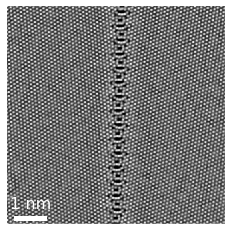

array([[0.79133856, 0.5866142 , 0.39370078, ..., 0.28346455, 0.27165353,
        0.36220473],
       [0.42125985, 0.28346455, 0.2480315 , ..., 0.14173228, 0.20866142,
        0.32677165],
       [0.28346455, 0.22440945, 0.27165353, ..., 0.30708662, 0.503937  ,
        0.5944882 ],
       ...,
       [0.38188976, 0.37401575, 0.31102362, ..., 0.6732283 , 0.8110236 ,
        0.7007874 ],
       [0.6771653 , 0.6496063 , 0.4488189 , ..., 0.5511811 , 0.6062992 ,
        0.53149605],
       [0.9015748 , 0.8464567 , 0.5944882 , ..., 0.503937  , 0.51968503,
        0.52362204]], dtype=float32)

In [4]:
new_Nx = int(float(Nx)*float(dx_origin)/float(dx_new))
new_Ny = int(float(Ny)*float(dx_origin)/float(dx_new))

image = cv2.resize(image, dsize=(new_Nx, new_Ny), interpolation=cv2.INTER_AREA)
image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

print(image.shape)
makeScalebar.scalebar(image, dx_new, filename)

Segment the experimental image to local windows and save them (filename: local_window_x_y.png). Also, save windowed and fft images of corresponding local window in 'Windowed' and 'FFT' directories, respectively. (Use hanning window)

/home/yeo/Work/notebook/segment/makeWindowingFFT.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/yeo/Work/notebook/segment/saveLocalwindow.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/yeo/Work/notebook/segment/makeWindowingFFT.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

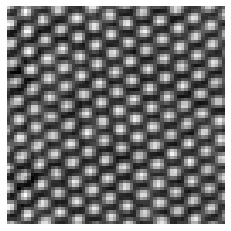

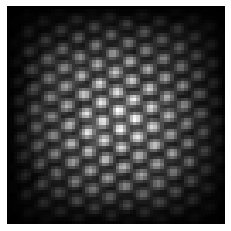

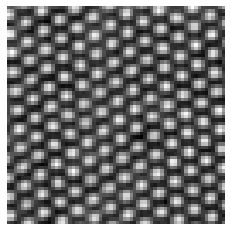

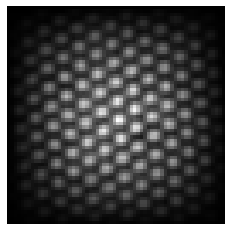

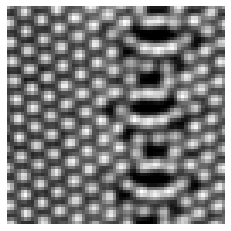

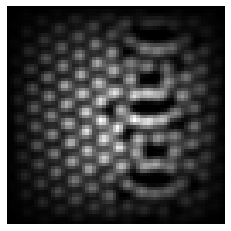

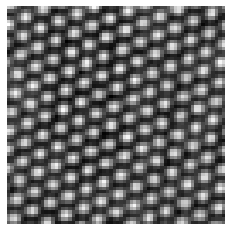

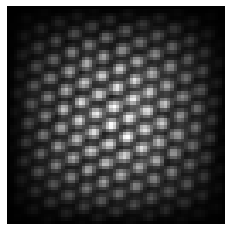

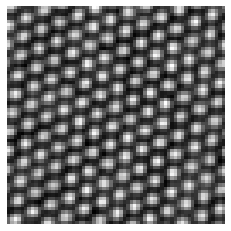

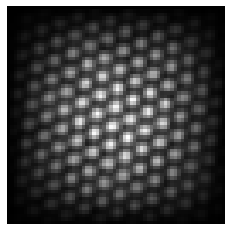

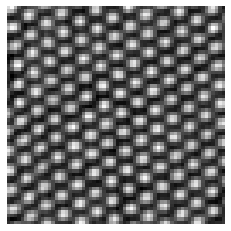

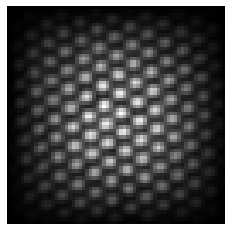

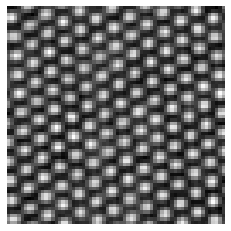

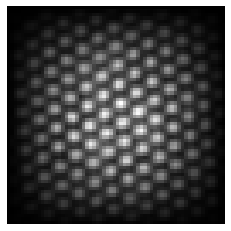

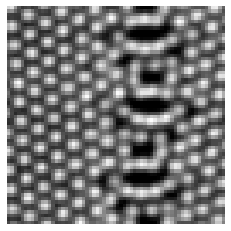

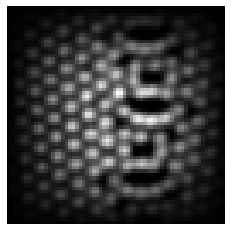

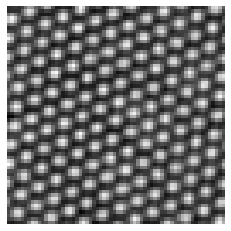

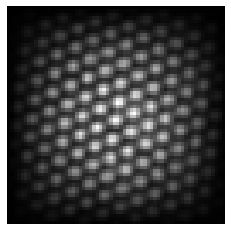

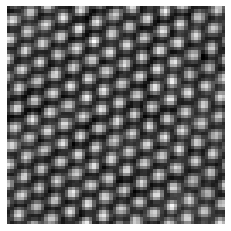

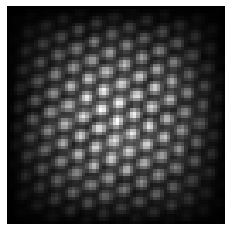

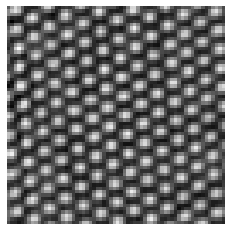

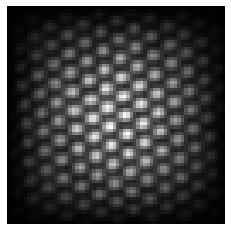

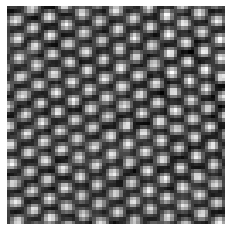

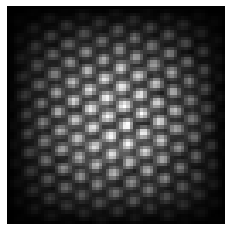

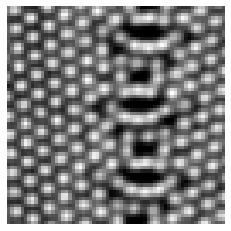

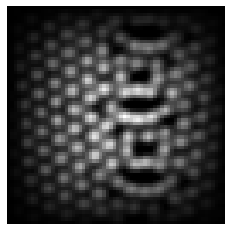

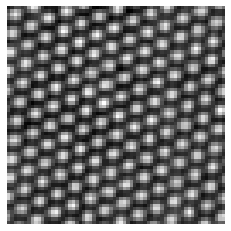

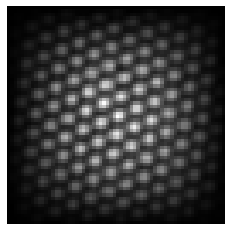

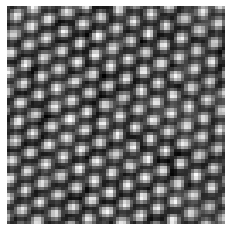

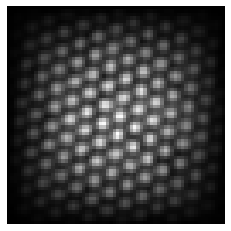

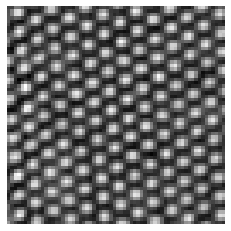

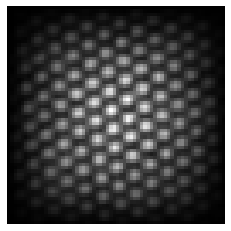

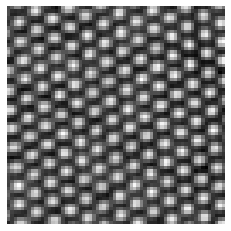

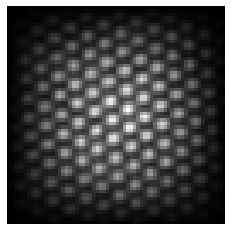

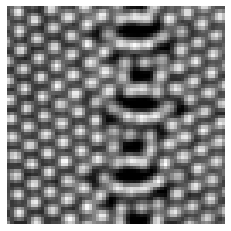

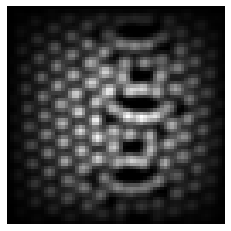

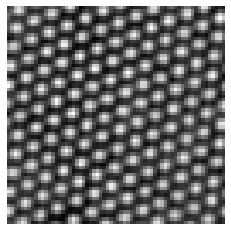

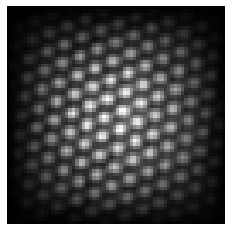

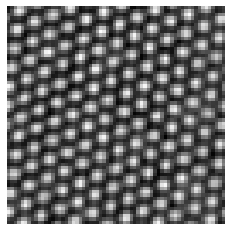

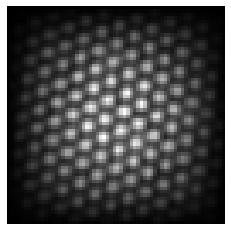

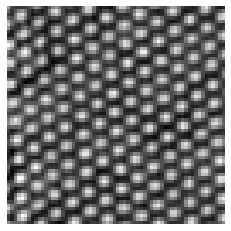

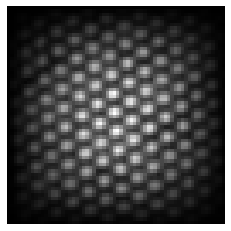

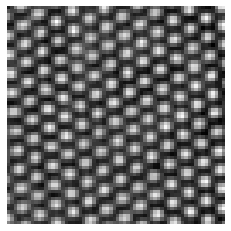

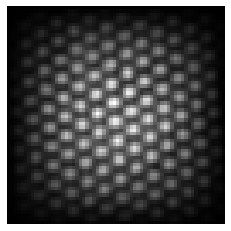

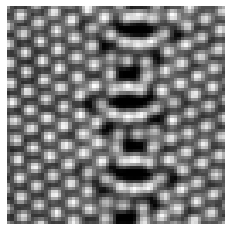

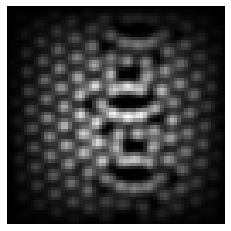

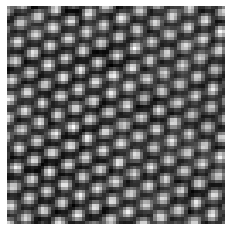

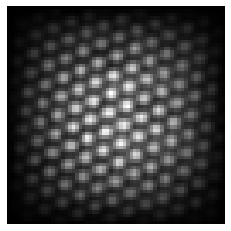

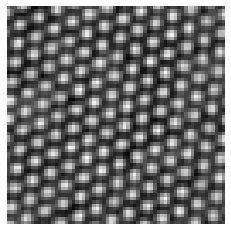

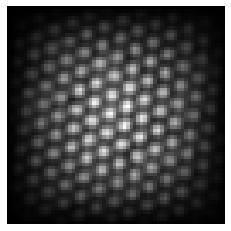

In [5]:
saveLocalwindow.localwindow(image, stride_size, pixel_max)